# Data Loading & Cleaning
This notebook focuses on loading the SACCO dataset, validating its structure,
and preparing it for analysis.


In [1]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv("ugenyasacco_members.csv")
df.head()


,MemberID,Gender,Age,Ward,MonthlyContribution,LoanAmount,LoanBalance,LoanStatus,DefaultRiskScore,MemberTenureYears
0,M001,Male,34,East Ugenya,3000,50000,35000,Active,0.25,4
1,M002,Female,29,West Ugenya,2000,30000,12000,Active,0.18,2
2,M003,Male,41,North Ugenya,5000,100000,80000,Delinquent,0.62,7
3,M004,Female,36,Ukwala,3500,60000,45000,Active,0.31,5
4,M005,Male,52,East Ugenya,4000,80000,0,Completed,0.05,10


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MemberID             100 non-null    object 
 1   Gender               100 non-null    object 
 2   Age                  100 non-null    int64  
 3   Ward                 100 non-null    object 
 4   MonthlyContribution  100 non-null    int64  
 5   LoanAmount           100 non-null    int64  
 6   LoanBalance          100 non-null    int64  
 7   LoanStatus           100 non-null    object 
 8   DefaultRiskScore     100 non-null    float64
 9   MemberTenureYears    100 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 7.9+ KB


In [5]:
# Check negative values where they shouldn't exist
numeric_cols = ['Age', 'MonthlyContribution', 'LoanAmount', 'LoanBalance', 'DefaultRiskScore']
(df[numeric_cols] < 0).sum()


Age                    0
MonthlyContribution    0
LoanAmount             0
LoanBalance            0
DefaultRiskScore       0
dtype: int64

### Key Insights
- The dataset contains 100 SACCO members with no missing values.
- Data types are appropriate for numerical and categorical analysis.
- No invalid negative values detected in financial or risk variables.
- The dataset is clean and ready for exploratory analysis.


# Exploratory Data Analysis (EDA)
This notebook explores SACCO member distribution, contributions,
loan portfolio structure, and delinquency patterns.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ugenyasacco_members.csv")


Matplotlib is building the font cache; this may take a moment.


In [8]:
#Members per Ward
df['Ward'].value_counts()


Ward
East Ugenya     25
West Ugenya     25
North Ugenya    25
Ukwala          25
Name: count, dtype: int64

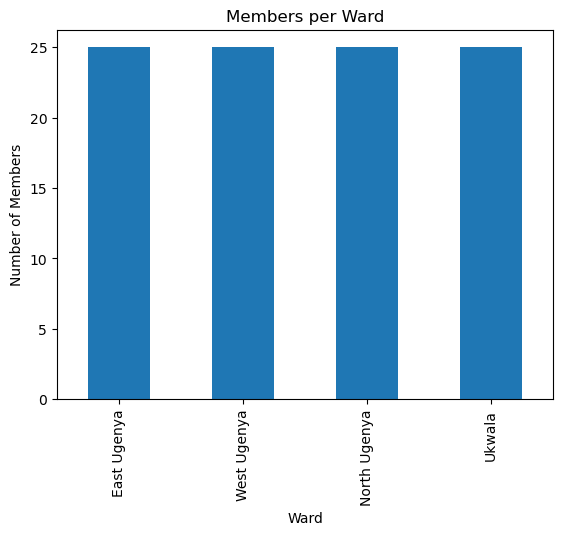

In [9]:
df['Ward'].value_counts().plot(kind='bar', title='Members per Ward')
plt.ylabel('Number of Members')
plt.show()


In [10]:
#Contributions by Ward
df.groupby('Ward')['MonthlyContribution'].sum()


Ward
East Ugenya     93500
North Ugenya    83200
Ukwala          85800
West Ugenya     76800
Name: MonthlyContribution, dtype: int64

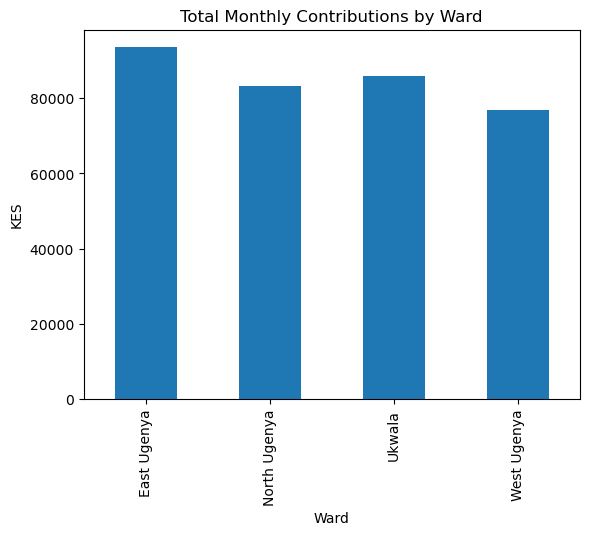

In [11]:
df.groupby('Ward')['MonthlyContribution'].sum().plot(
    kind='bar', title='Total Monthly Contributions by Ward'
)
plt.ylabel('KES')
plt.show()


📊 **Code Cell — Loan Book vs Outstanding Balance**

In [12]:
total_loan_book = df['LoanAmount'].sum()
total_outstanding = df['LoanBalance'].sum()

total_loan_book, total_outstanding


(6040000, 3214000)

🚨 **Code Cell — Delinquency Rate**

In [13]:
npl_rate = (df['LoanStatus'] == 'Delinquent').mean()
npl_rate


0.17

### Key Insights
- SACCO membership is fairly distributed across wards.
- Contribution levels vary by ward, indicating different savings capacities.
- A significant portion of the loan book remains outstanding.
- Delinquent loans represent a material risk to portfolio performance.
